In [1]:
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import re

In [2]:
cwd = os.getcwd()
up_two_folders = os.path.join(cwd, os.pardir, os.pardir)
normalized_path = os.path.normpath(up_two_folders)
os.chdir(normalized_path)

In [3]:
#Read the file with all CS data for various student groups over years 2021-22 combined
df = pd.read_excel("data/CS_data_21_22.xlsx")
df

,District Name,District Code,K,1,2,3,4,5,6,7,8,9,10,11,12,All Grades,Total Students,Student Group,Year
0,Abby Kelley Foster Charter Public (District),4450000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,293,Hispanic/Latino,2022
1,Abington,10000,0,0,0,0,0,0,0,0,0,0,0,1,0,1,281,Hispanic/Latino,2022
2,Academy Of the Pacific Rim Charter Public (Dis...,4120000,0,0,0,0,0,0,0,0,0,0,0,4,4,8,144,Hispanic/Latino,2022
3,Acton-Boxborough,6000000,0,0,0,0,0,0,0,0,0,1,0,0,2,3,379,Hispanic/Latino,2022
4,Acushnet,30000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,Hispanic/Latino,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,Woburn,3470000,0,0,0,0,0,0,0,0,0,9,4,7,26,46,4177,All Students,2021
9652,Worcester,3480000,0,0,0,0,0,0,0,0,0,34,103,88,118,343,20249,All Students,2021
9653,Worthington,3490000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58,All Students,2021
9654,Wrentham,3500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,835,All Students,2021


In [4]:
#Print all the student groups in the data
df['Student Group'].unique()

array(['Hispanic/Latino', 'English Learner', 'Nat. Haw. or Pacif. Isl.',
       'Male', 'Low Income', 'Amer. Ind. or Alaska Nat.',
       'Afr. Amer./Black', 'Asian', 'High needs', 'White', 'Female',
       'All Students', 'Students w/disabilities'], dtype=object)

In [5]:
#Read the Massachusetts polygon shape file
df_polygon = gpd.read_file('data/Visualization Data/TOWNSSURVEY_POLYM.shp')
df_polygon

,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH90_00,TYPE,FOURCOLOR,FIPS_STCO,SUM_ACRES,SUM_SQUARE,POP2010,POPCH00_10,POPCH80_90,SHAPE_AREA,SHAPE_LEN,geometry
0,LOWELL,160,93473,103439,105167,1728,C,4,25017,9298.780,14.531,106519,1352,9966,3.763066e+07,28403.664058,"POLYGON ((216431.383 935122.985, 217384.292 93..."
1,BEVERLY,30,34575,38195,39862,1667,C,1,25009,9863.262,15.411,39502,-360,3620,3.991521e+07,38638.706350,"MULTIPOLYGON (((247412.633 926932.675, 249132...."
2,GLOUCESTER,107,28092,28716,30273,1557,C,3,25009,17088.570,26.700,28789,-1484,624,6.915496e+07,159379.402958,"MULTIPOLYGON (((264186.562 935044.815, 264207...."
3,CHESTER,59,1182,1280,1308,28,T,4,25013,23784.924,37.164,1337,29,98,9.625415e+07,37542.272855,"POLYGON ((80255.212 900279.565, 84998.072 8998..."
4,WINCHESTER,344,20021,20267,20810,543,T,2,25017,4062.159,6.347,21374,564,246,1.643902e+07,19080.564132,"POLYGON ((232109.422 913780.365, 231307.062 91..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,EASTHAMPTON,87,16189,15537,15994,457,C,3,25015,8707.337,13.605,16053,59,-652,3.523734e+07,33943.997268,"POLYGON ((103344.752 893965.825, 104317.992 89..."
347,NORTH ANDOVER,210,21670,22792,27202,4410,T,4,25009,17738.929,27.716,28352,1150,1122,7.178508e+07,41127.590428,"POLYGON ((232049.362 942816.125, 233051.542 94..."
348,NORTON,218,13156,14265,18036,3771,T,3,25005,18759.888,29.312,19031,995,1109,7.591856e+07,36981.001648,"POLYGON ((233072.343 860388.955, 231021.932 85..."
349,HAMPDEN,120,4665,4709,5171,462,T,4,25013,12568.904,19.639,5139,-32,44,5.086454e+07,29419.000427,"POLYGON ((128209.623 865065.755, 126153.943 86..."


In [6]:
#Remove the State Totals rows
df = df[df['District Name']!='State Totals']

#Create a dataframe with all districts the data is available and map them with towns in the polygon shape file
df_districts = pd.DataFrame({'District Name':list(df['District Name'].unique())})

def get_matching_towns(x):
    matching_towns = []
    for i in re.split(' |-', x):
        if i.lower() in list(df_polygon['TOWN'].str.lower()):
            matching_towns.append(df_polygon['TOWN'][df_polygon['TOWN'].str.lower()==i.lower()].iloc[0])
    if len(matching_towns)==0:
        return None
    return matching_towns


df_districts['Polygon_Town_mapping'] = df_districts['District Name'].apply(lambda x: get_matching_towns(x))
print(f"The number of districts with no town mapping is {df_districts['Polygon_Town_mapping'].isnull().sum()}")
df_districts

The number of districts with no town mapping is 106


,District Name,Polygon_Town_mapping
0,Abby Kelley Foster Charter Public (District),None
1,Abington,[ABINGTON]
2,Academy Of the Pacific Rim Charter Public (Dis...,None
3,Acton-Boxborough,"[ACTON, BOXBOROUGH]"
4,Acushnet,[ACUSHNET]
...,...,...
399,Paulo Freire Social Justice Charter School (Di...,None
400,Sabis International Charter (District),None
401,Southern Worcester County Regional Vocational ...,[WORCESTER]
402,Florida,[FLORIDA]


In [7]:
#Create 1 on 1 mapping
df_districts = df_districts.explode('Polygon_Town_mapping')

#A town shape polygon is mapped to multiple districts, so creating the df with town -> list of districts mapping
df_districts = df_districts.groupby('Polygon_Town_mapping')['District Name'].agg(lambda x: list(set(x))).reset_index()
df_districts

,Polygon_Town_mapping,District Name
0,ABINGTON,[Abington]
1,ACTON,[Acton-Boxborough]
2,ACUSHNET,[Acushnet]
3,ADAMS,[North Adams]
4,AGAWAM,[Agawam]
...,...,...
257,WOBURN,[Woburn]
258,WORCESTER,[Southern Worcester County Regional Vocational...
259,WORTHINGTON,[Worthington]
260,WRENTHAM,[Wrentham]


In [35]:
#Create groupby student group and another along with year
df_cs_g = df.groupby("Student Group").sum().reset_index()
df_y_cs_g = df.groupby(['Year',"Student Group"]).sum().reset_index()

#Create a df with cs participation % for 21, 22 , combined for all student groups
df_cs_g['All Grades Student Percentage'] = df_cs_g['All Grades']*100/df_cs_g['Total Students']
df_y_cs_g['All Grades Student Percentage'] = df_y_cs_g['All Grades']*100/df_y_cs_g['Total Students']
df_cs_g['All Grades Student Percentage'] = df_cs_g['All Grades']*100/df_cs_g['Total Students']

df_cs_g['Year'] = '2021-2022'

grouped = pd.concat([df_y_cs_g[['Year', 'Student Group','All Grades Student Percentage']], 
                    df_cs_g[['Year', 'Student Group','All Grades Student Percentage']]], ignore_index=True).groupby(['Student Group','Year']).sum().unstack()

grouped

All Grades Student Percentage                    
Year                                               2021      2022 2021-2022
Student Group                                                              
Afr. Amer./Black                               2.949000  3.405306  3.178185
All Students                                   3.578725  4.346549  3.964403
Amer. Ind. or Alaska Nat.                      2.932255  3.913043  3.433794
Asian                                          5.654902  6.957949  6.310680
English Learner                                1.274537  1.564458  1.430533
Female                                         2.416374  3.066907  2.742525
High needs                                     2.626594  3.356130  3.009800
Hispanic/Latino                                2.453593  2.863991  2.665803
Low Income                                     2.583218  3.300953  2.973569
Male                                           4.688925  5.559983  5.126941
Nat. Haw. or Pacif. Isl.                       1.437908  2.193548  1.818182
Students w/disabilities                        2.405159  3.120700  2.769262
White                                          3.899190  4.829282  4.359949

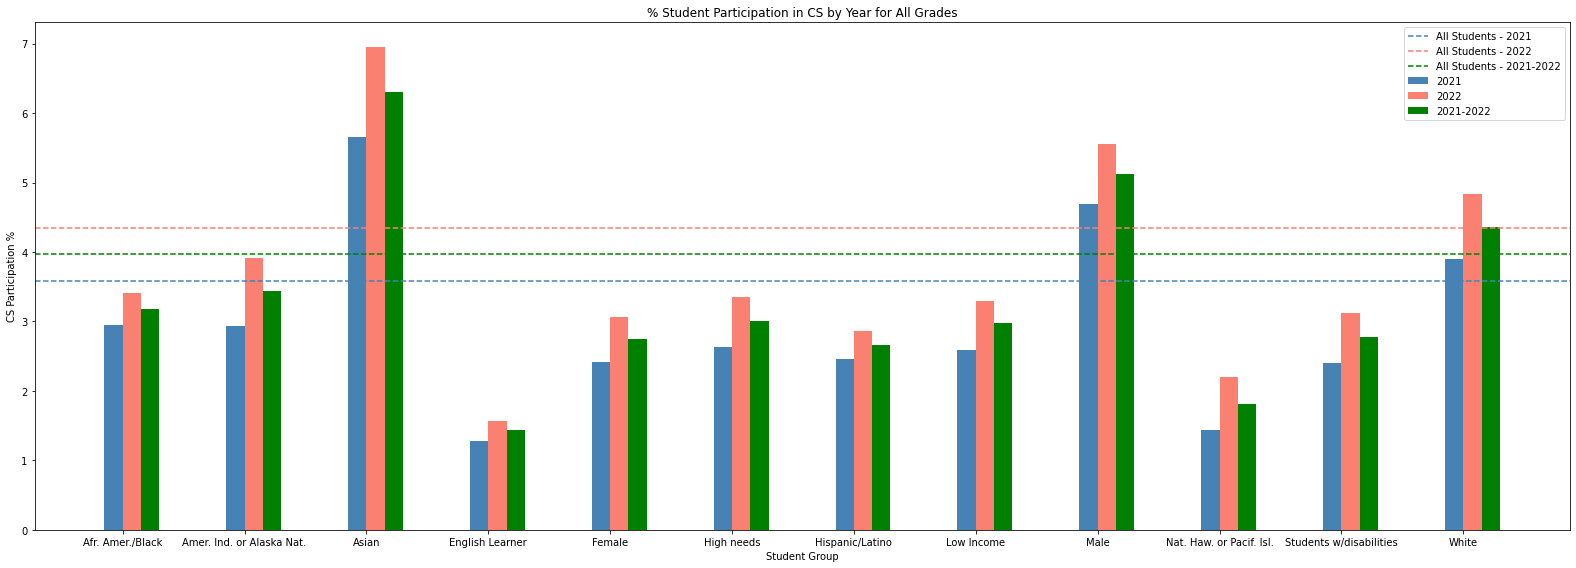

In [36]:
import matplotlib.pyplot as plt

barWidth = 0.15
student_groups = grouped.index

fig, ax = plt.subplots(figsize=(22, 8))

# Plot All Students as horizontal lines
all_students = grouped.loc['All Students'].values
for idx, sale in enumerate(all_students):
    color_map = ['steelblue', 'salmon', 'green']
    ax.axhline(y=sale, color=color_map[idx], linestyle='--', label=f'All Students - {grouped.columns[idx][1]}')

grouped = grouped[grouped.index!='All Students']
student_groups = grouped.index

r1 = range(len(student_groups))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth*2 for x in r1]
    
# Create the bars
ax.bar(r1, grouped[('All Grades Student Percentage', 2021)], width=barWidth, label='2021', color = 'steelblue')
ax.bar(r2, grouped[('All Grades Student Percentage', 2022)], width=barWidth, label='2022', color = 'salmon')
ax.bar(r3, grouped[('All Grades Student Percentage', '2021-2022')], width=barWidth, label='2021-2022', color = 'green')


# Add some details
ax.set_xlabel('Student Group')
ax.set_ylabel('CS Participation %')
ax.set_title('% Student Participation in CS by Year for All Grades')
ax.set_xticks([r + barWidth/2 for r in range(len(student_groups))])
ax.set_xticklabels(student_groups)
ax.legend()


# Display
plt.tight_layout()
plt.show()


K            0.0
1            0.0
2       0.189358
3       0.965726
4       0.321909
5       0.435524
6         2.8025
7       5.945844
8       5.586063
9      17.894338
10     21.189169
11     20.772581
12     23.896989
Name: Afr. Amer./Black, dtype: object
K       0.058037
1       0.060869
2       0.765812
3       1.426873
4       1.043259
5        1.34194
6       4.205594
7       7.948304
8      12.437008
9      16.686484
10     16.350999
11     16.980918
12     20.693902
Name: All Students, dtype: object
K            0.0
1            0.0
2            0.0
3       0.719424
4            0.0
5       0.719424
6       3.597122
7       4.316547
8      14.388489
9      20.863309
10     15.827338
11     18.705036
12     20.863309
Name: Amer. Ind. or Alaska Nat., dtype: object
K            0.0
1            0.0
2       0.172861
3       0.395111
4       0.246944
5       0.259291
6       1.098901
7       4.827757
8       7.173725
9      16.878627
10     21.410051
11      21.54587
12     25.9908

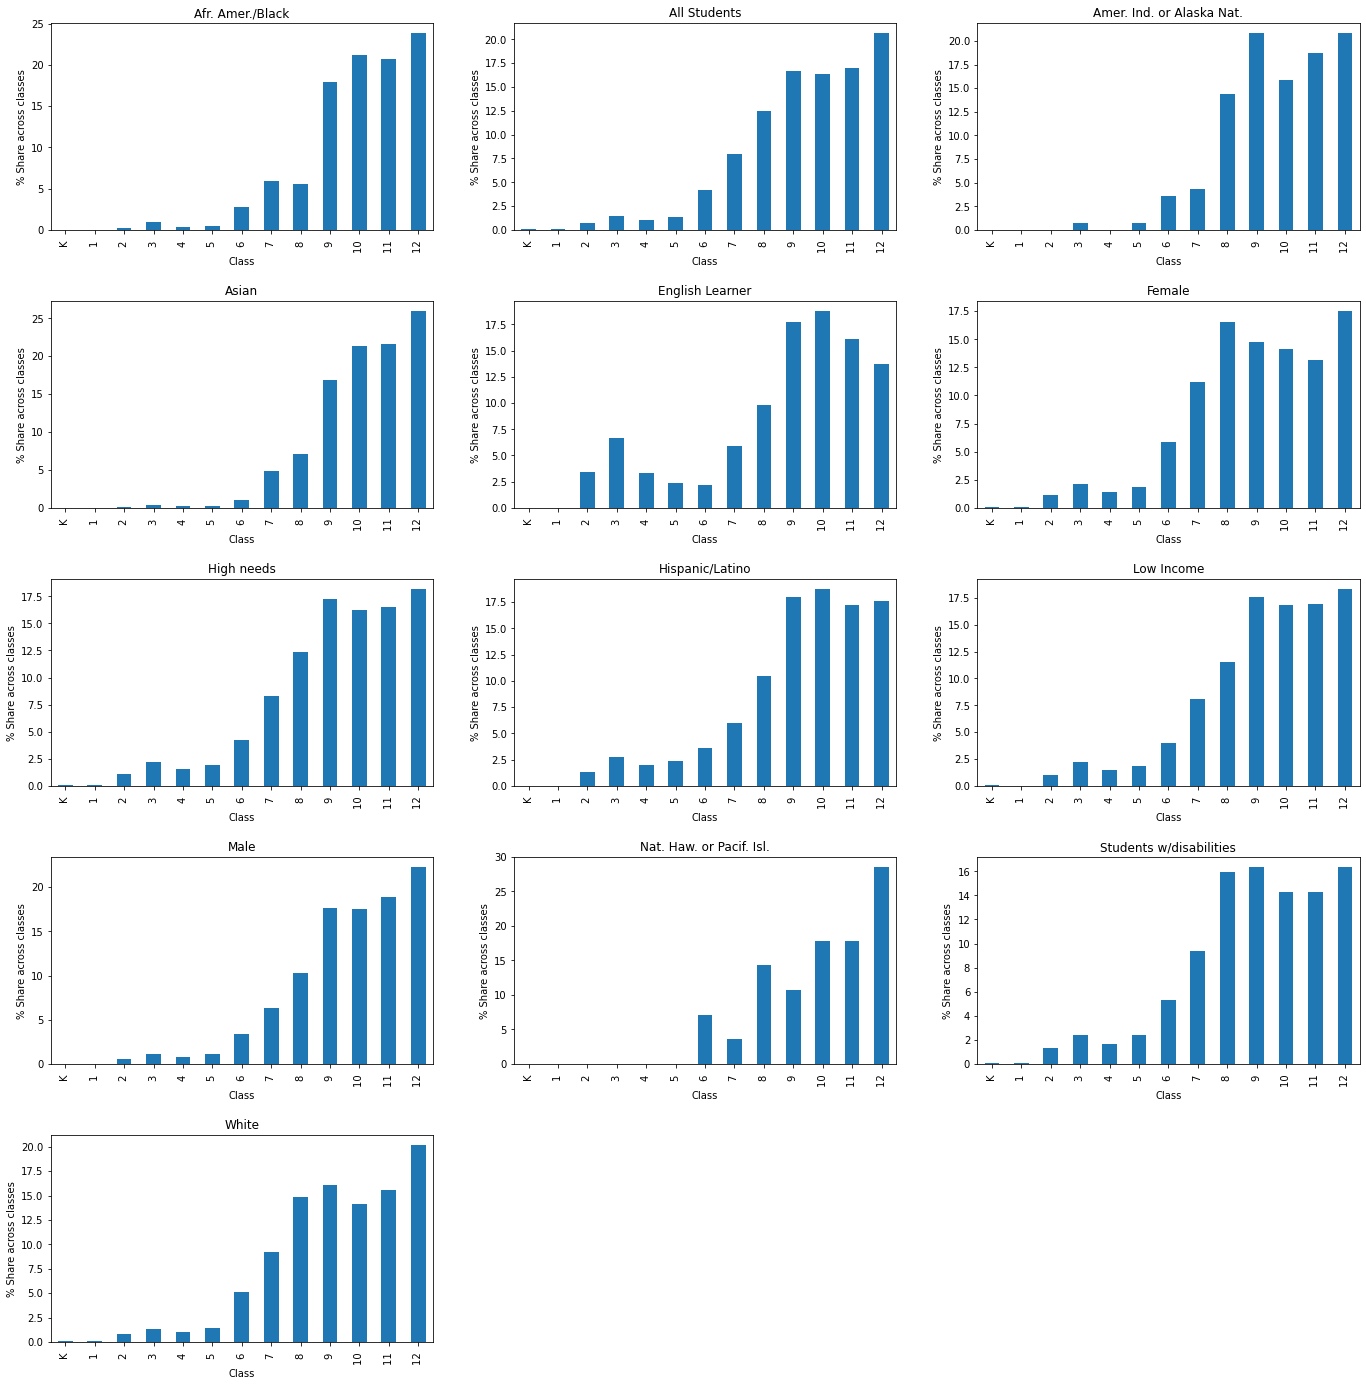

In [37]:
#within each group check the distribution of classes
col_list = []
for i in ['K']+list(range(1,13)):
    df_cs_g[str(i)+' '] = df_cs_g[str(i)]*100/df_cs_g['All Grades']
    col_list.append(str(i)+' ')

df_cs_g = df_cs_g.set_index('Student Group')

# Set up the figure size and grid for subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20)) # Adjust the size as needed
fig.tight_layout(pad=5.0)  # Adds padding between plots

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

for ind,i in enumerate(df_cs_g.index):
    df_cs_g_x = df_cs_g.loc[i, col_list]
    print(df_cs_g_x)
    df_cs_g_x.plot(kind = 'bar', ax=axes_flat[ind])
    axes_flat[ind].set_xlabel("Class")
    axes_flat[ind].set_ylabel("% Share across classes")
    axes_flat[ind].set_title(i)
    
for j in range(13, 15):
    fig.delaxes(axes_flat[j])
    
plt.show()

In [11]:
df_all_students = df[df['Student Group']=='All Students']

df_all_students_g = df_all_students.groupby('District Name')[['All Grades', 'Total Students']].sum().reset_index()

def get_cs_part(x):
    if len(df_districts[df_districts['Polygon_Town_mapping']==x])>0:
        x = df_districts['District Name'][df_districts['Polygon_Town_mapping']==x].iloc[0]
        a = 0
        b = 0
        for i in x:
            a = a+df_all_students_g['All Grades'][df_all_students_g['District Name']==i].iloc[0]
            b = b+df_all_students_g['Total Students'][df_all_students_g['District Name']==i].iloc[0]
        return a*100/b
    else:
        return None
        

df_polygon['CS Participation %'] = df_polygon['TOWN'].apply(lambda x:get_cs_part(x))
df_polygon

,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH90_00,TYPE,FOURCOLOR,FIPS_STCO,SUM_ACRES,SUM_SQUARE,POP2010,POPCH00_10,POPCH80_90,SHAPE_AREA,SHAPE_LEN,geometry,CS Participation %
0,LOWELL,160,93473,103439,105167,1728,C,4,25017,9298.780,14.531,106519,1352,9966,3.763066e+07,28403.664058,"POLYGON ((216431.383 935122.985, 217384.292 93...",1.817732
1,BEVERLY,30,34575,38195,39862,1667,C,1,25009,9863.262,15.411,39502,-360,3620,3.991521e+07,38638.706350,"MULTIPOLYGON (((247412.633 926932.675, 249132....",4.664980
2,GLOUCESTER,107,28092,28716,30273,1557,C,3,25009,17088.570,26.700,28789,-1484,624,6.915496e+07,159379.402958,"MULTIPOLYGON (((264186.562 935044.815, 264207....",3.551162
3,CHESTER,59,1182,1280,1308,28,T,4,25013,23784.924,37.164,1337,29,98,9.625415e+07,37542.272855,"POLYGON ((80255.212 900279.565, 84998.072 8998...",NaN
4,WINCHESTER,344,20021,20267,20810,543,T,2,25017,4062.159,6.347,21374,564,246,1.643902e+07,19080.564132,"POLYGON ((232109.422 913780.365, 231307.062 91...",3.658815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,EASTHAMPTON,87,16189,15537,15994,457,C,3,25015,8707.337,13.605,16053,59,-652,3.523734e+07,33943.997268,"POLYGON ((103344.752 893965.825, 104317.992 89...",6.312057
347,NORTH ANDOVER,210,21670,22792,27202,4410,T,4,25009,17738.929,27.716,28352,1150,1122,7.178508e+07,41127.590428,"POLYGON ((232049.362 942816.125, 233051.542 94...",NaN
348,NORTON,218,13156,14265,18036,3771,T,3,25005,18759.888,29.312,19031,995,1109,7.591856e+07,36981.001648,"POLYGON ((233072.343 860388.955, 231021.932 85...",2.747492
349,HAMPDEN,120,4665,4709,5171,462,T,4,25013,12568.904,19.639,5139,-32,44,5.086454e+07,29419.000427,"POLYGON ((128209.623 865065.755, 126153.943 86...",3.635621


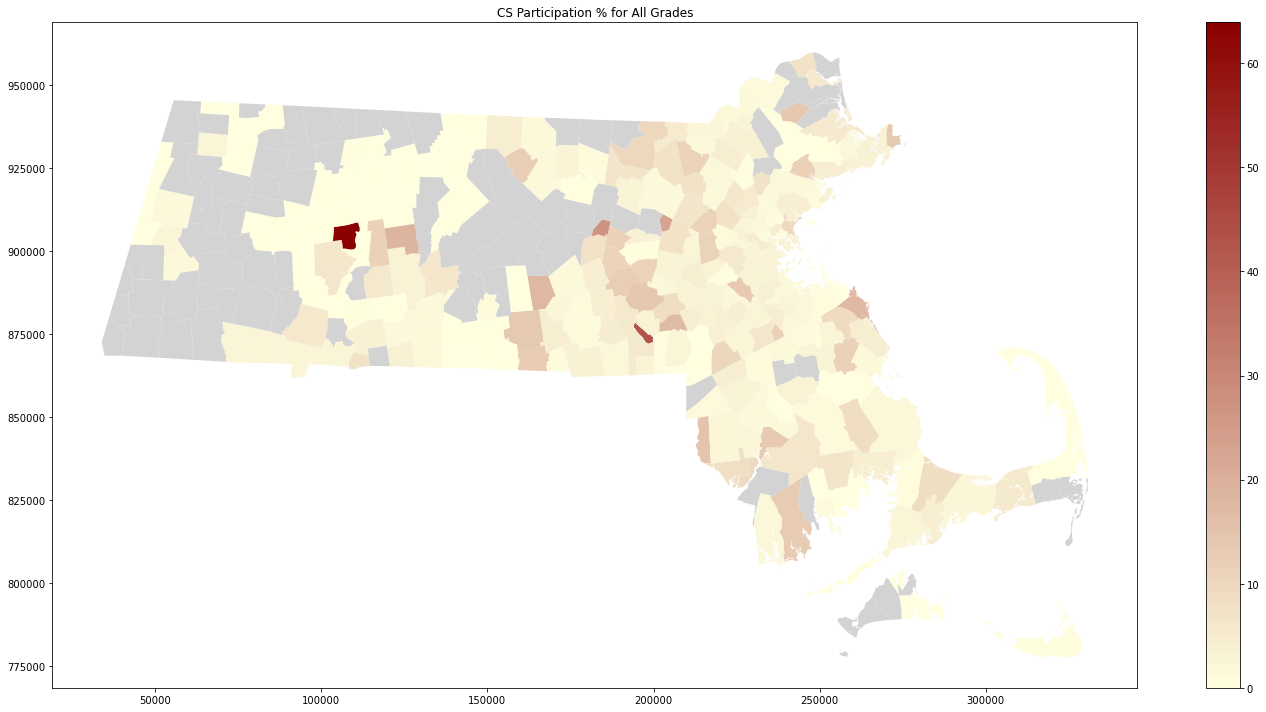

In [12]:
from matplotlib.colors import LinearSegmentedColormap

fig, ax = plt.subplots(figsize=(20, 10))
cmap = LinearSegmentedColormap.from_list('mycmap', ['lightyellow', 'darkred'])

# Specify the color for missing data (grey in this case)
missing_color = 'lightgray'

df_polygon.plot(column='CS Participation %',cmap=cmap,missing_kwds={'color': missing_color}, legend=True, ax=ax)

plt.title("CS Participation % for All Grades")
plt.tight_layout()
plt.show()

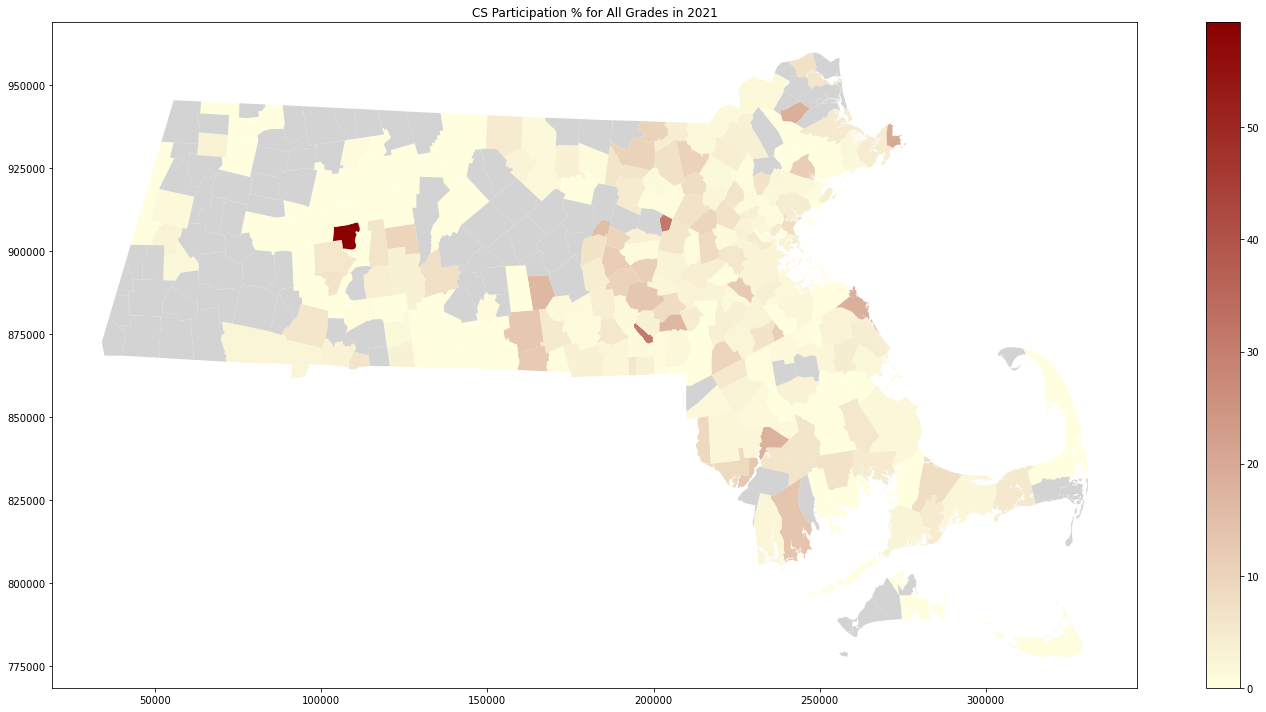

,TOWN,CS Participation %
305,HATFIELD,59.366755
68,MAYNARD,31.499556
7,HOPEDALE,31.034483
293,ROCKPORT,19.736842
87,SCITUATE,18.501420


In [13]:
#Plot only for 2021
df_all_students_g = df_all_students[df_all_students['Year']==2021].groupby('District Name')[['All Grades', 'Total Students']].sum().reset_index()

def get_cs_part(x):
    try:
        if len(df_districts[df_districts['Polygon_Town_mapping']==x])>0:
            x = df_districts['District Name'][df_districts['Polygon_Town_mapping']==x].iloc[0]
            a = 0
            b = 0
            for i in x:
                a = a+df_all_students_g['All Grades'][df_all_students_g['District Name']==i].iloc[0]
                b = b+df_all_students_g['Total Students'][df_all_students_g['District Name']==i].iloc[0]
            return a*100/b
        else:
            return None
    except:
        return None
        

df_polygon['CS Participation %'] = df_polygon['TOWN'].apply(lambda x:get_cs_part(x))

fig, ax = plt.subplots(figsize=(20, 10))
cmap = LinearSegmentedColormap.from_list('mycmap', ['lightyellow', 'darkred'])

# Specify the color for missing data (grey in this case)
missing_color = 'lightgray'

df_polygon.plot(column='CS Participation %',cmap=cmap,missing_kwds={'color': missing_color}, legend=True, ax=ax)

plt.title("CS Participation % for All Grades in 2021")
plt.tight_layout()
plt.show()

#print top 5 districts 
df_polygon[['TOWN','CS Participation %']].sort_values(by = 'CS Participation %', ascending= False).iloc[:5,:]


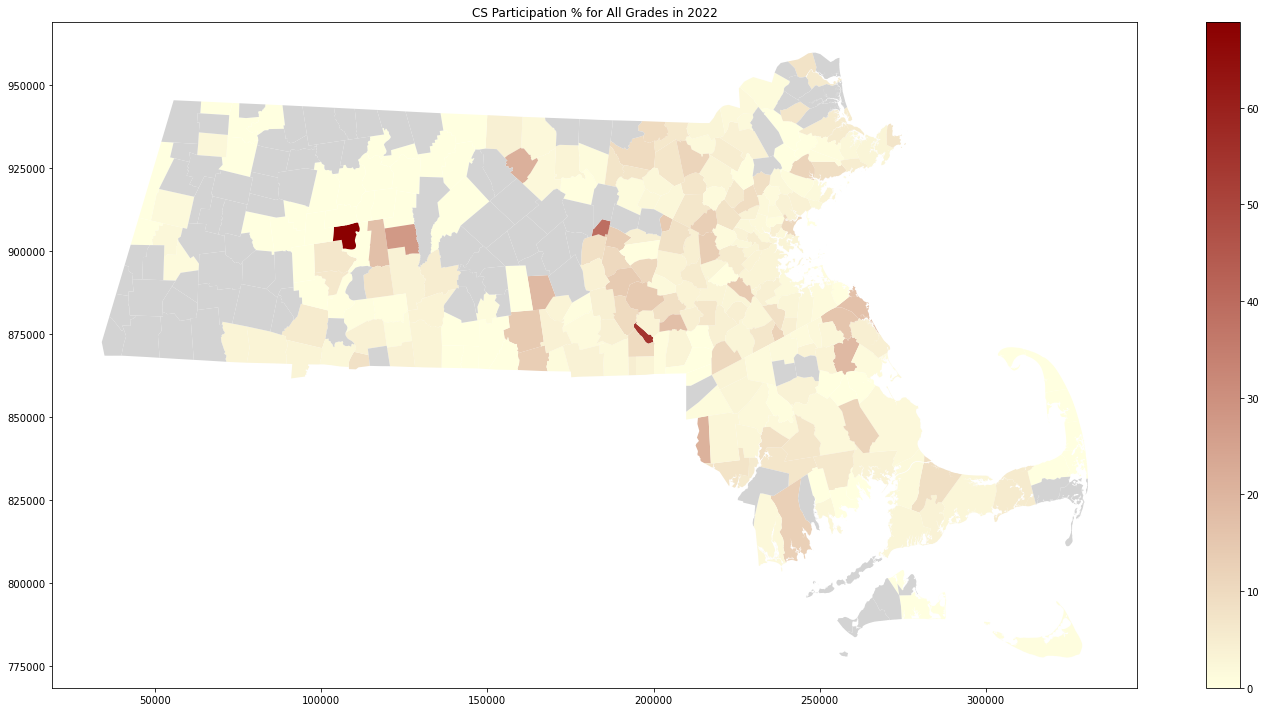

,TOWN,CS Participation %
305,HATFIELD,68.838527
7,HOPEDALE,54.813360
202,CLINTON,39.045093
213,PELHAM,27.446809
270,GARDNER,21.337580


In [14]:
#Plot only for 2021
df_all_students_g = df_all_students[df_all_students['Year']==2022].groupby('District Name')[['All Grades', 'Total Students']].sum().reset_index()

def get_cs_part(x):
    try:
        if len(df_districts[df_districts['Polygon_Town_mapping']==x])>0:
            x = df_districts['District Name'][df_districts['Polygon_Town_mapping']==x].iloc[0]
            a = 0
            b = 0
            for i in x:
                a = a+df_all_students_g['All Grades'][df_all_students_g['District Name']==i].iloc[0]
                b = b+df_all_students_g['Total Students'][df_all_students_g['District Name']==i].iloc[0]
            return a*100/b
        else:
            return None
    except:
        return None
        

df_polygon['CS Participation %'] = df_polygon['TOWN'].apply(lambda x:get_cs_part(x))

fig, ax = plt.subplots(figsize=(20, 10))
cmap = LinearSegmentedColormap.from_list('mycmap', ['lightyellow', 'darkred'])

# Specify the color for missing data (grey in this case)
missing_color = 'lightgray'

df_polygon.plot(column='CS Participation %',cmap=cmap,missing_kwds={'color': missing_color}, legend=True, ax=ax)

plt.title("CS Participation % for All Grades in 2022")
plt.tight_layout()
plt.show()

#print top 5 districts 
df_polygon[['TOWN','CS Participation %']].sort_values(by = 'CS Participation %', ascending= False).iloc[:5,:]
